# **Лабораторна робота 4: Прогнозування даних системи Лоренца та об'єктів Нарендра-Пархтізаратхі за допомогою  моделей машинного навчання**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**

 Робота з даними, згенерованими системою Лоренца та об'єктами Нарендра-Пархтізаратхі, для передбачення майбутніх значеннь за допомогою  моделей машинного навчання.

#### **Система Лоренца:**

Система Лоренца описується трьома диференціальними рівняннями:

$$
\begin{cases}
\frac{dx}{dt} = \sigma (y - x) \\
\frac{dy}{dt} = x (\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{cases}
$$

де:
- $( \sigma )$ — коефіцієнт Прандтля (зазвичай $ \sigma = 10 $),
- $( \rho )$ — числовий параметр для турбулентності (зазвичай $ \rho = 28 $),
- $( \beta )$ — коефіцієнт відношення висоти до довжини (зазвичай $ \beta = 8/3 $).

#### **Об'єкти Нарендра-Пархтізаратхі:**

Об'єкти Нарендра-Пархтізаратхі описуються наступними рівняннями:

$$
\begin{cases}
x_1(t+1) = \alpha_1 x_1(t) + \beta_1 x_2(t) + \gamma_1 x_3(t) + \delta_1 \\
x_2(t+1) = \alpha_2 x_1(t) + \beta_2 x_2(t) + \gamma_2 x_3(t) + \delta_2 \\
x_3(t+1) = \alpha_3 x_1(t) + \beta_3 x_2(t) + \gamma_3 x_3(t) + \delta_3
\end{cases}
$$

де $(\alpha_i)$, $(\beta_i)$, $(\gamma_i)$ і $(\delta_i)$ — коефіцієнти для кожного з рівнянь.

#### **Завдання до лабораторної роботи:**

Завдання 1. *Генерація даних:*

   1.1 Згенеруйте дані для системи Лоренца з використанням зазначених параметрів. Виробіть не менше ніж 10 000 точок даних.

   1.2 Згенеруйте дані для об'єктів Нарендра-Пархтізаратхі, використовуючи різні значення коефіцієнтів $(\alpha_i)$, $(\beta_i)$, $(\gamma_i)$ і $(\delta_i)$. Виробіть не менше ніж 10 000 точок даних.

---
Завдання 2. *Підготовка даних:*
   
   2.1 Розділіть дані на навчальний, валідаційний і тестовий набори. Використовуйте 70% для навчання, 15% для валідації та 15% для тестування.
   
   2.2 Нормалізуйте дані за допомогою StandardScaler. Убедитесь, що всі дані масштабовані перед навчанням моделей.

---
Завдання 3. *Моделювання:*
   
   3.1 Застосуйте наступні моделі машинного навчання:
     
     - Лінійна регресія
     - Дерево рішень
     - Случайний ліс (Random Forest)
     - Метод опорних векторів (SVM)
   
   3.2 Для кожної моделі виконайте тренування на навчальному наборі даних.

---
Завдання 4. *Підбір гіперпараметрів:*
   
   4.1 Для кожної моделі використовуйте Grid Search для підбору оптимальних гіперпараметрів. Параметри для підбору:
     
     - Лінійна регресія: (не потребує підбору гіперпараметрів, але перевірте регуляризацію)
     - Дерево рішень: `max_depth`, `min_samples_split`, `min_samples_leaf`
     - Випадковий ліс: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`
     - SVM: `C`, `kernel`, `gamma`
---
Завдання 5. *Оцінка моделей:*
   
   5.1 Оцініть кожну модель на валідаційному наборі за допомогою середньої квадратичної помилки (MSE) та R².
  
   5.2 Виконайте фінальну оцінку на тестовому наборі даних.

---
Завдання 6. *Аналіз результатів:*
   
   6.1 Порівняйте результати всіх моделей. Створіть таблицю з метриками для кожної моделі.

   6.2 Візуалізуйте результати прогнозування для кожної моделі (наприклад, графіки реальних значень проти прогнозованих).

---
Завдання 7. *Документація та звіт:*
   
   7.1 Опишіть методику генерації даних, моделювання, підбору гіперпараметрів та оцінки моделей.
   
   7.2 Підготуйте звіт з результатами, включаючи таблиці, графіки та висновки про найкращу модель.

---
#### **Інструкції:**

1. **Генерація даних:**
   Використовуйте бібліотеки `numpy` та `scipy` для генерації даних.

2. **Навчання моделей:**
   Використовуйте `scikit-learn` для реалізації моделей і налаштування гіперпараметрів.

3. **Оцінка моделей:**
   Використовуйте функції `mean_squared_error`, `r2_score` з `sklearn.metrics` для оцінки.

4. **Візуалізація:**
   Для візуалізації використовуйте бібліотеки `matplotlib` та `seaborn`.

5. **Документація:**
   Оформіть звіт у форматі Jupyter Notebook.

Task 1.1

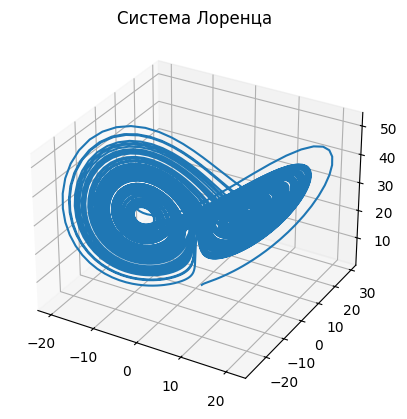

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_system(sigma, rho, beta, dt, num_steps):
    x, y, z = 1.0, 1.0, 1.0  
    data = []

    for _ in range(num_steps):
        data.append((x, y, z))
        dxdt = sigma * (y - x)
        dydt = x * (rho - z) - y
        dzdt = x * y - beta * z
        x += dxdt * dt
        y += dydt * dt
        z += dzdt * dt

    return np.array(data)

sigma = 10
rho = 28
beta = 8/3
dt = 0.01
num_steps = 10000

lorenz_data = lorenz_system(sigma, rho, beta, dt, num_steps)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(lorenz_data[:, 0], lorenz_data[:, 1], lorenz_data[:, 2])
ax.set_title("Система Лоренца")
plt.show()


Task 1.2

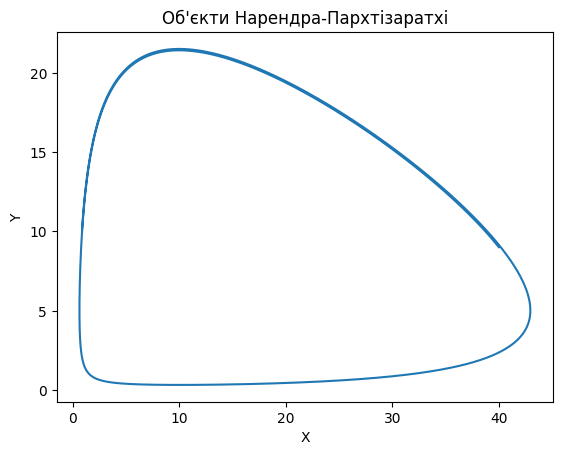

In [25]:
def np_model(alpha, beta, gamma, delta, dt, num_steps):
    x, y = 40.0, 9.0  
    data = []

    for _ in range(num_steps):
        data.append((x, y))
        dxdt = alpha * x - beta * x * y
        dydt = delta * x * y - gamma * y
        x += dxdt * dt
        y += dydt * dt

    return np.array(data)

alpha = 0.1
beta = 0.02
gamma = 0.1
delta = 0.01
num_steps = 10000

np_data = np_model(alpha, beta, gamma, delta, dt, num_steps)
plt.plot(np_data[:, 0], np_data[:, 1])
plt.title("Об'єкти Нарендра-Пархтізаратхі")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Task 2.1

In [26]:
from sklearn.model_selection import train_test_split

X_lorenz = lorenz_data[:, :-1]
y_lorenz = lorenz_data[:, -1]
X_np = np_data[:, :-1]
y_np = np_data[:, -1]

X_train_l, X_temp_l, y_train_l, y_temp_l = train_test_split(X_lorenz, y_lorenz, test_size=0.3, random_state=42)
X_val_l, X_test_l, y_val_l, y_test_l = train_test_split(X_temp_l, y_temp_l, test_size=0.5, random_state=42)
X_train_np, X_temp_np, y_train_np, y_temp_np = train_test_split(X_np, y_np, test_size=0.3, random_state=42)
X_val_np, X_test_np, y_val_np, y_test_np = train_test_split(X_temp_np, y_temp_np, test_size=0.5, random_state=42)


Task 2.2

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_l = scaler.fit_transform(X_train_l)
X_val_l = scaler.transform(X_val_l)
X_test_l = scaler.transform(X_test_l)
X_train_np = scaler.fit_transform(X_train_np)
X_val_np = scaler.transform(X_val_np)
X_test_np = scaler.transform(X_test_np)


Task 3.1

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR()
}

Task 3.2

In [29]:
for model_name, model in models.items():
    model.fit(X_train_l, y_train_l)

Task 4

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5)
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=5)

grid_search_dt.fit(X_train_l, y_train_l)
grid_search_rf.fit(X_train_l, y_train_l)
grid_search_svm.fit(X_train_l, y_train_l)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

Task 5

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

results = {}
for model_name, model in models.items():
    predictions = model.predict(X_val_l)
    mse = mean_squared_error(y_val_l, predictions)
    r2 = r2_score(y_val_l, predictions)
    results[model_name] = {'MSE': mse, 'R2': r2}

for model_name, model in models.items():
    predictions = model.predict(X_test_l)
    mse = mean_squared_error(y_test_l, predictions)
    r2 = r2_score(y_test_l, predictions)
    results[model_name]['Test MSE'] = mse
    results[model_name]['Test R2'] = r2

Task 6.1

In [32]:
import pandas as pd

results_df = pd.DataFrame(results).T
print(results_df)

                         MSE        R2   Test MSE   Test R2
Linear Regression  67.978103 -0.002232  64.693975 -0.001475
Decision Tree      10.661666  0.842810  10.062104  0.844237
Random Forest       5.587350  0.917623   5.691784  0.911890
SVM                14.120395  0.791817  13.979412  0.783596


Task 6.2

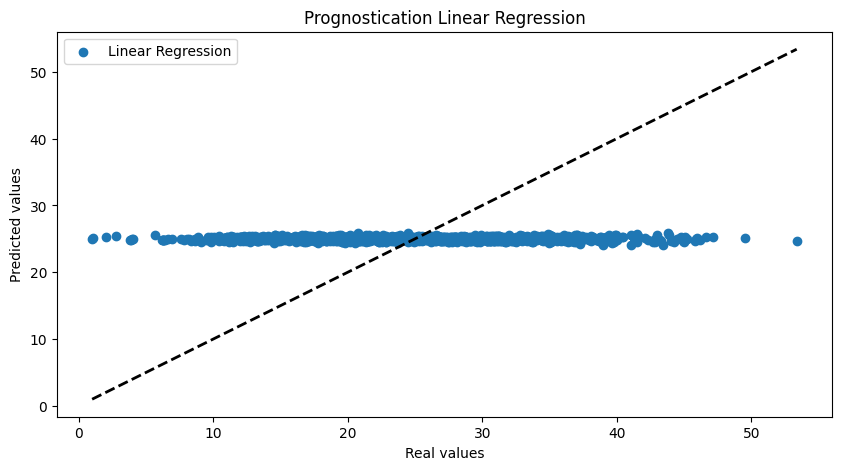

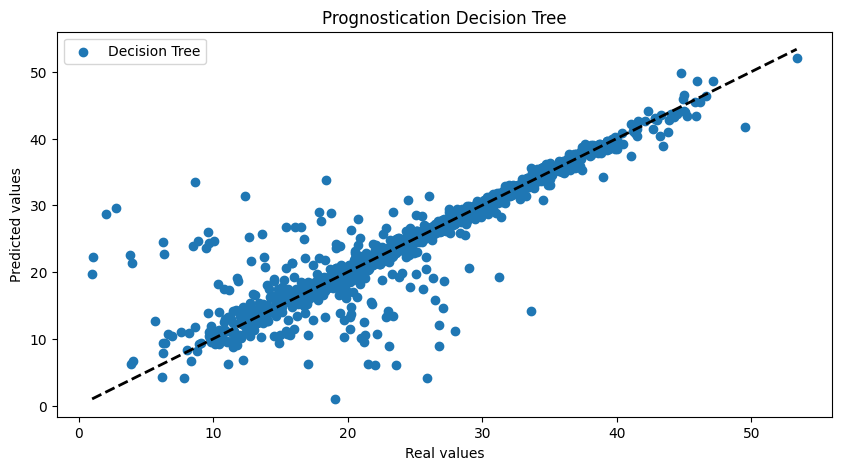

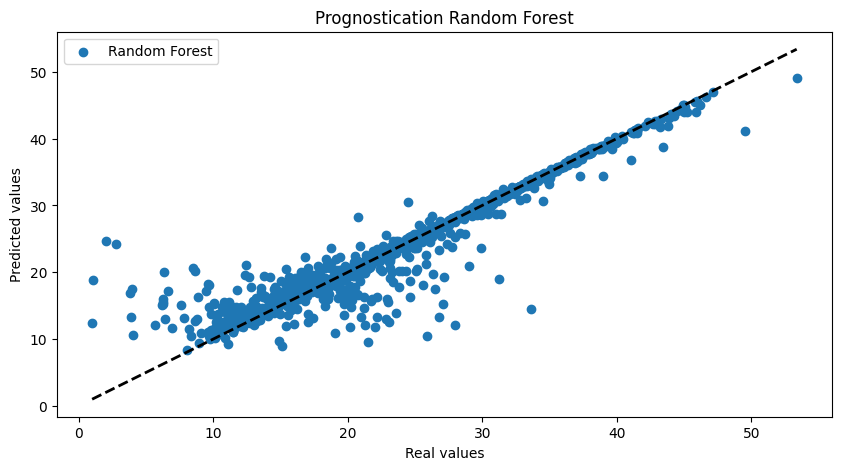

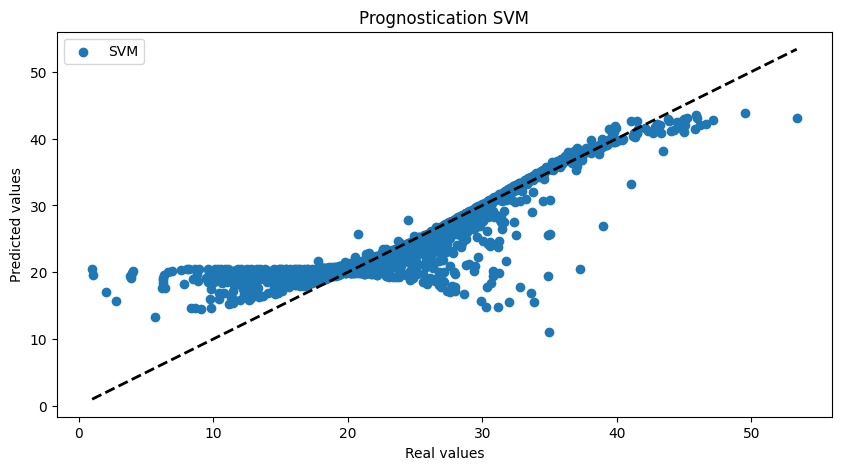

In [33]:
for model_name, model in models.items():
    plt.figure(figsize=(10, 5))
    predictions = model.predict(X_test_l)
    plt.scatter(y_test_l, predictions, label=model_name)
    plt.xlabel("Real values")
    plt.ylabel("Predicted values")
    plt.title(f"Prognostication {model_name}")
    plt.plot([y_test_l.min(), y_test_l.max()], [y_test_l.min(), y_test_l.max()], 'k--', lw=2)
    plt.legend()
    plt.show()

## **Додаткова умова до лабораторної роботи 5:**

*Для того, щоб отримати оцінку більше 50 балів, Вам необхідно використати якесь з цих рівнянь. Вибір рівняння вібдувається відповідно до Вашого номеру в журналі групи.*


**Об'єкти Нарендра-Партхізаратхі (Narendra-Parthasarathy)** — це нелінійні системи управління, які часто використовуються для тестування адаптивних і нелінійних регуляторів. Їх поведінка моделюється нелінійними диференціальними рівняннями, що описують динаміку в часі. Ці рівняння створюють цікаву, нелінійну та хаотичну поведінку системи.

### **Нелінійних рівнянь Нарендра-Партхізаратхі:**

1. $$
\dot{x}_1 = -a_1 x_1 + b_1 x_2^2
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \sin(x_1)
$$

2. $$
\dot{x}_1 = a_1 \sin(x_2) - b_1 x_1^2
$$
$$
\dot{x}_2 = a_2 x_1 x_2 - b_2 \cos(x_1)
$$

3. $$
\dot{x}_1 = -a_1 x_1 + b_1 x_2^3
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_2
$$

4. $$
\dot{x}_1 = a_1 x_1 - b_1 x_2 \sin(x_1)
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \cos(x_1)
$$

5. $$
\dot{x}_1 = -a_1 x_1 + b_1 x_2^2 \cos(x_1)
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_1 x_2
$$

6. $$
\dot{x}_1 = a_1 x_1 x_2 - b_1 x_1^3
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_2^2
$$

7. $$
\dot{x}_1 = -a_1 x_1^2 + b_1 \cos(x_2)
$$
$$
\dot{x}_2 = a_2 x_1 - b_2 \sin(x_2)
$$

8. $$
\dot{x}_1 = a_1 \sin(x_2) - b_1 x_1^2
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 x_1 \cos(x_2)
$$

9. $$
\dot{x}_1 = a_1 x_1^2 - b_1 x_2^2
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 \sin(x_2)
$$

10. $$
\dot{x}_1 = -a_1 x_1 \sin(x_2) + b_1 x_2^3
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 x_1 x_2
$$

11. $$
\dot{x}_1 = a_1 \sin(x_1 x_2) - b_1 x_1
$$
$$
\dot{x}_2 = -a_2 x_2^2 + b_2 \cos(x_1)
$$

12. $$
\dot{x}_1 = -a_1 x_1 + b_1 \sin(x_2^2)
$$
$$
\dot{x}_2 = a_2 x_1^2 - b_2 \cos(x_1)
$$

13. $$
\dot{x}_1 = a_1 x_1 x_2 - b_1 \sin(x_1^2)
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \cos(x_1 x_2)
$$

14. $$
\dot{x}_1 = a_1 x_1 - b_1 x_2^2 \sin(x_1)
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 x_1^3
$$

15. $$
\dot{x}_1 = a_1 \cos(x_2) - b_1 x_1^2 \sin(x_1)
$$
$$
\dot{x}_2 = -a_2 x_1 x_2 + b_2 \cos(x_1^2)
$$

16. $$
\dot{x}_1 = -a_1 \sin(x_1) + b_1 x_2^2
$$
$$
\dot{x}_2 = a_2 \sin(x_1 x_2) - b_2 \cos(x_1)
$$

17. $$
\dot{x}_1 = a_1 x_1^2 \cos(x_2) - b_1 x_1 x_2
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \sin(x_1^2)
$$

18. $$
\dot{x}_1 = -a_1 x_1 \sin(x_2) + b_1 \cos(x_1^2)
$$
$$
\dot{x}_2 = a_2 x_1^2 - b_2 \cos(x_1 x_2)
$$

19. $$
\dot{x}_1 = a_1 \sin(x_2) - b_1 x_1^2
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 x_2^2
$$

20. $$
\dot{x}_1 = -a_1 x_1^2 + b_1 \sin(x_1 x_2)
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 \sin(x_2^2)
$$

### Параметри:
- $( a_1, a_2 )$, $( b_1, b_2 )$ — це коефіцієнти, які можуть бути варійовані для дослідження динаміки системи та впливу на прогнозування.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sklearn
import seaborn as sns

In [35]:
a1 = 1
a2 = 1
b1 = 1
b2 = 1

In [36]:
def system(t, y):
    x1, x2 = y
    dx1dt = a1 * np.cos(x2) - b1 * x1**2 * np.sin(x1)
    dx2dt = -a2 * x1 * x2 + b2 * np.cos(x1**2)
    return [dx1dt, dx2dt]

In [37]:
y0 = [0.5, 0.5]
t_span = (0, 10)  
t_eval = np.linspace(t_span[0], t_span[1], 100) 

In [38]:
solution = solve_ivp(system, t_span, y0, t_eval=t_eval)

In [39]:
solution = solve_ivp(system, t_span, y0, t_eval=t_eval)

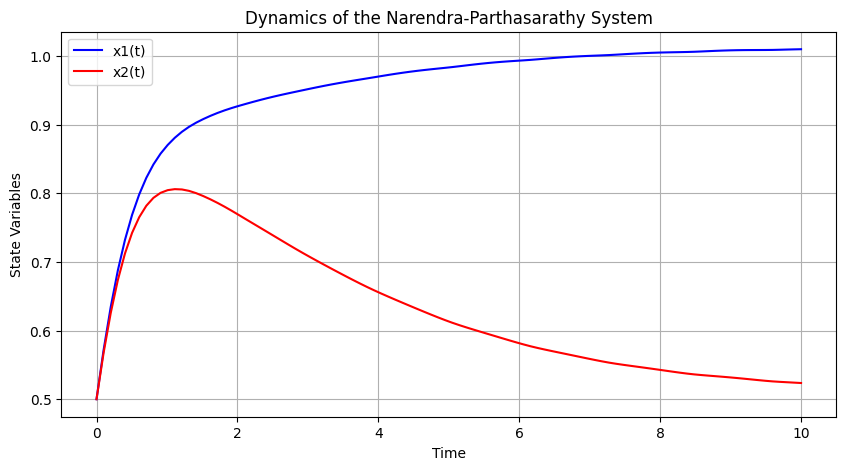

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(solution.t, solution.y[0], label='x1(t)', color='b')
plt.plot(solution.t, solution.y[1], label='x2(t)', color='r')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.title('Dynamics of the Narendra-Parthasarathy System')
plt.legend()
plt.grid()
plt.show()